In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
matplotlib 3.2.2
numpy 1.19.0
pandas 1.0.5
sklearn 0.23.1
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
# 在线下载
fashion_mnist = keras.datasets.fashion_mnist #天朝下载缓慢
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [ ]:
# 离线加载
import numpy as np
import os
import gzip

def load_data(data_folder):

  files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
  ]

  paths = []
  for fname in files:
    paths.append(os.path.join(data_folder,fname))
    print(os.path.join(data_folder,fname))

  with gzip.open(paths[0], 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[1], 'rb') as imgpath:
    x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

  with gzip.open(paths[2], 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

  with gzip.open(paths[3], 'rb') as imgpath:
    x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

  return (x_train, y_train), (x_test, y_test)

# 训练集 验证集 测试集
(x_train_all, y_train_all), (x_test, y_test) = load_data("datasets/fashion_mnist") #加载数据
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

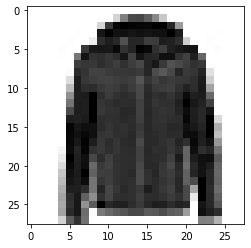

In [3]:
def show_single_image(img_arr):
    plt.imshow(img_arr, cmap="binary")
    plt.show()
    
show_single_image(x_train[0])


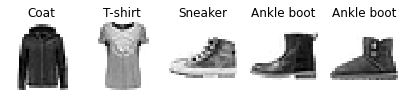

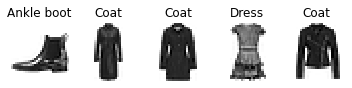

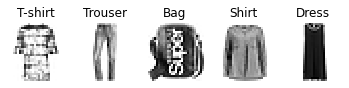

In [4]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols * 1.4, n_rows * 1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap="binary", interpolation = 'nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
        plt.show()
        
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(3, 5, x_train, y_train, class_names)
        

In [27]:
# tf.keras.models.Sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
# relu: y = max(0, x)
# softmax : 将向量变成概率分布， x = [x1, x2, x3]
# y = [e^x1/sum + e^x2/sum + e^x3/sum] =1, sum = e^x1 + e^x2 + e^x3 

# sparse稀疏，没有转成独热编码
# reason for sparse : y -> index . y -> one_hot ->[] 
model.compile(loss="sparse_categorical_crossentropy", optimizer="Adagrad", metrics=["accuracy"])


In [28]:
model.layers

In [29]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_14 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 参数Param计算 全连接层Dense  例如 235500
#[None, 784] * W + b -> [None, 300]        W.shape[784,300] , b=[300]


In [31]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 10s 190us/sample - loss: 2.6967 - accuracy: 0.7492 - val_loss: 1.6209 - val_accuracy: 0.7908
Epoch 2/20
55000/55000 [==============================] - 10s 176us/sample - loss: 1.3056 - accuracy: 0.7975 - val_loss: 1.3037 - val_accuracy: 0.7960
Epoch 3/20
55000/55000 [==============================] - 10s 174us/sample - loss: 1.0584 - accuracy: 0.8117 - val_loss: 1.2043 - val_accuracy: 0.8026
Epoch 4/20
55000/55000 [==============================] - 9s 167us/sample - loss: 0.9182 - accuracy: 0.8205 - val_loss: 1.0633 - val_accuracy: 0.8134
Epoch 5/20
55000/55000 [==============================] - 10s 179us/sample - loss: 0.8235 - accuracy: 0.8298 - val_loss: 1.0197 - val_accuracy: 0.8130
Epoch 6/20
55000/55000 [==============================] - 9s 170us/sample - loss: 0.7542 - accuracy: 0.8350 - val_loss: 0.9730 - val_accuracy: 0.8146
Epoch 7/20
55000/55000 [=======================

In [32]:
type(history)

tensorflow.python.keras.callbacks.History

In [33]:
history.history

{'loss': [2.696739068889618,
  1.305558460795744,
  1.0583827075001868,
  0.9181685902411287,
  0.8234639222903685,
  0.7541730739766901,
  0.7010539797306061,
  0.659366887524995,
  0.6229298675970598,
  0.5935928634356369,
  0.567603230042891,
  0.5451734392187813,
  0.5246151945200833,
  0.5059757489280268,
  0.4905019948981025,
  0.4737671517697248,
  0.46048611983819443,
  0.4486043986835263,
  0.4370533947099339,
  0.4258950212256475],
 'accuracy': [0.74921817,
  0.7974727,
  0.81167275,
  0.82045454,
  0.82978183,
  0.83501816,
  0.8389091,
  0.84385455,
  0.84903634,
  0.8523818,
  0.85603637,
  0.8593818,
  0.86265457,
  0.86512727,
  0.8682727,
  0.8697091,
  0.8729636,
  0.8748182,
  0.8767818,
  0.879],
 'val_loss': [1.6209073311269284,
  1.3036897498130797,
  1.2043047612145543,
  1.0633112470701336,
  1.0196516096331179,
  0.9729856980588287,
  0.9397076294496656,
  0.921280892360583,
  0.9032809314291924,
  0.8856509036399424,
  0.8741694258839823,
  0.8513044035265223,


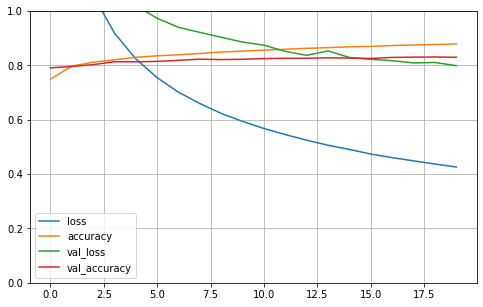

In [34]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)


In [13]:
model.evaluate(x_test,y_test) #模型评估预测

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[2.302603372955322, 0.1]